# Notebook for the ENS Challenge Data 2022 - Qube Research & Technologies 

# **Learning factors for stock market returns prediction**

### By François Goujon
Initially based on the notebook template provided with the challenge.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import nnls, lsq_linear
from scipy.linalg import lstsq, pinv
from sklearn.linear_model import LinearRegression

## Data preparation

In [2]:
X_train = pd.read_csv('X_train.csv', index_col=0, sep=',')
X_train.columns.name = 'date'

Y_train = pd.read_csv('Y_train.csv', index_col=0, sep=',')
Y_train.columns.name = 'date'

In [3]:
X_train

date,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
stocksID,,,,,,,,,,,,,,,,,,,,,
0,-0.018647,-0.013002,-0.010776,-0.016676,-0.005110,0.009092,-0.011745,0.007120,-0.008451,0.009119,...,-0.012525,-0.011716,0.003532,0.009965,0.018142,-0.001236,-0.002732,0.013074,-0.005843,-0.003823
1,-0.008254,-0.022280,0.012173,-0.006820,-0.004055,0.012912,-0.001293,0.009994,-0.002747,0.001664,...,0.014432,-0.002255,-0.011493,0.002291,-0.001346,-0.004026,-0.004672,-0.002889,-0.004984,0.005005
2,-0.008404,-0.013629,-0.006044,-0.003425,-0.009522,-0.001353,-0.000637,0.007640,0.001600,0.007416,...,-0.006245,-0.001329,0.005230,0.003510,0.006022,-0.000343,0.001757,0.004972,0.004916,-0.007338
3,-0.022734,-0.006981,-0.008568,-0.010899,-0.017981,0.002485,-0.011980,0.012446,-0.010636,0.003807,...,-0.005179,-0.003442,0.002733,0.013369,0.019738,0.001201,-0.003669,0.008690,0.000272,-0.008150
4,-0.024546,-0.008315,-0.007991,-0.003515,0.007872,0.007082,-0.004614,-0.008182,-0.005255,0.014404,...,-0.017507,-0.001233,-0.000552,0.004664,0.005202,0.007695,0.003775,0.005097,0.001135,-0.009262
5,-0.019243,-0.004789,-0.004691,0.002805,-0.006069,0.013317,-0.009282,0.002037,-0.006620,0.006847,...,-0.009037,-0.005853,0.004862,0.023105,0.004867,0.007474,-0.002425,0.003741,0.006103,-0.004848
6,0.000083,-0.006233,-0.009110,0.054403,-0.012260,-0.007213,0.004900,0.004977,-0.023857,-0.004389,...,0.028464,-0.006714,-0.009104,0.002638,-0.009386,-0.006070,0.000114,0.004040,0.005345,0.015671
7,-0.015313,-0.014736,-0.000887,-0.007216,-0.002479,0.009570,0.018751,0.010083,0.001444,-0.003139,...,0.009826,0.002853,-0.007369,0.000135,-0.004778,0.000125,-0.009989,0.000157,-0.007284,0.008943
8,-0.001305,-0.004197,-0.019816,-0.005595,0.008634,-0.008648,-0.001997,-0.021690,-0.006224,-0.022626,...,-0.004459,0.005680,-0.003207,0.002527,0.002005,0.002379,0.001253,-0.003839,0.002579,0.000397


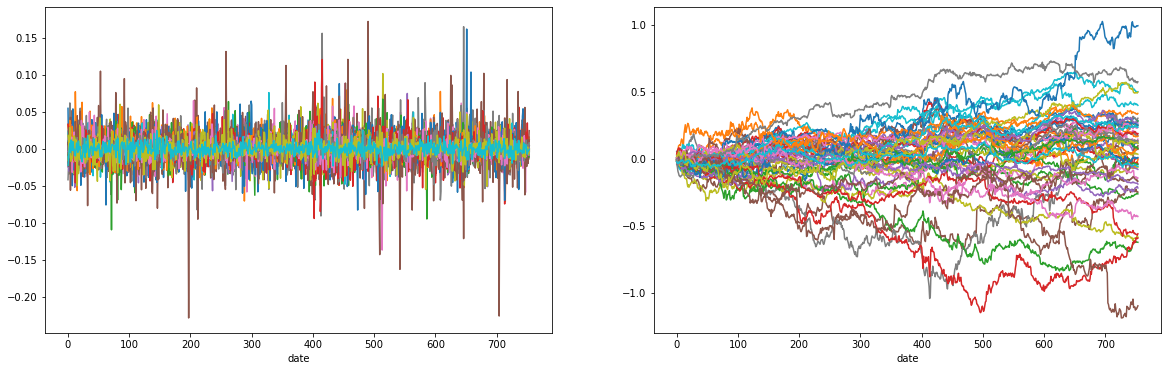

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
# The returns of the 50 stocks from the training data set over the three year period 
X_train.T.plot(legend=False, ax=ax1)
# The cumulative returns of the 50 stocks from the training data set over the three year period 
X_train.T.cumsum().plot(legend=False, ax=ax2)
plt.show()

### A useful data representation:

To speed up upcoming computations, we reshape the data  into a DataFrame with index (date, stock) and columns the lagged return values of the stock at time "date-1, ..., date-250". <br> 

The motivation is that, given model parameters 'A' and 'beta', the associated predictions for Y_train are simply given by **Ypred = ( X_train_reshape @ A @ beta ).unstack().T** ie **Ypred = (F @ beta).unstack().T**

In [6]:
X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ], 1).dropna()
X_train_reshape.columns = pd.Index(range(1,251), name='timeLag')

/var/folders/9s/mnbf7ynj4250m39tyvxgpknw0000gn/T/ipykernel_7409/1489607172.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  X_train_reshape = pd.concat([ X_train.T.shift(i+1).stack(dropna=False) for i in range(250) ], 1).dropna()


In [7]:
X_train_reshape

timeLag             1         2         3         4         5         6    \
date stocksID                                                               
250  0         0.000103  0.012387  0.011243  0.002595 -0.008509 -0.002711   
     1        -0.000982  0.003932  0.000050  0.001616 -0.003902 -0.001686   
     2         0.009301  0.003914  0.004995  0.001539  0.001452  0.002809   
     3         0.006515 -0.006553  0.009464  0.005204  0.004227 -0.005438   
     4        -0.006223  0.005415  0.014643  0.005195  0.004489  0.002695   
...                 ...       ...       ...       ...       ...       ...   
753  45        0.009786 -0.001861  0.012294 -0.023981  0.004069  0.000148   
     46       -0.008842  0.003698  0.005138 -0.004295 -0.010509  0.010230   
     47       -0.008607  0.006122 -0.007828 -0.008224  0.011357 -0.012855   
     48       -0.007519  0.001956  0.001903  0.001535  0.000695  0.004107   
     49       -0.002816 -0.002696 -0.007145 -0.001814  0.004331  0.005457   

timeLag             7         8         9         10   ...       241  \
date stocksID                                          ...             
250  0         0.008934  0.006571 -0.018546 -0.008353  ...  0.009119   
     1         0.008810  0.001585 -0.000745 -0.002155  ...  0.001664   
     2         0.005177 -0.006942 -0.013340 -0.008071  ...  0.007416   
     3         0.008861  0.004025 -0.012432 -0.006100  ...  0.003807   
     4         0.007609  0.011437 -0.004804  0.039274  ...  0.014404   
...                 ...       ...       ...       ...  ...       ...   
753  45       -0.062300  0.040002 -0.003475 -0.016284  ...  0.003808   
     46        0.006846  0.017514 -0.010796 -0.026356  ... -0.012077   
     47        0.000346 -0.016681  0.008247 -0.002723  ...  0.007291   
     48       -0.011879  0.000526  0.003178 -0.010654  ...  0.010960   
     49        0.000633 -0.005819  0.007592 -0.002003  ... -0.024003   

timeLag             242       243       244       245       246       247  \
date stocksID                                                               
250  0        -0.008451  0.007120 -0.011745  0.009092 -0.005110 -0.016676   
     1        -0.002747  0.009994 -0.001293  0.012912 -0.004055 -0.006820   
     2         0.001600  0.007640 -0.000637 -0.001353 -0.009522 -0.003425   
     3        -0.010636  0.012446 -0.011980  0.002485 -0.017981 -0.010899   
     4        -0.005255 -0.008182 -0.004614  0.007082  0.007872 -0.003515   
...                 ...       ...       ...       ...       ...       ...   
753  45       -0.003027  0.002522 -0.006594 -0.000489  0.054751 -0.012180   
     46       -0.002215  0.027569  0.021476  0.003874 -0.001690  0.012346   
     47        0.000369  0.000962 -0.005902  0.001067  0.013055  0.015432   
     48       -0.012003 -0.001969  0.030976 -0.000712  0.009795 -0.006842   
     49        0.001416  0.003348 -0.003685 -0.002267 -0.006733  0.000575   

timeLag             248       249       250  
date stocksID                                
250  0        -0.010776 -0.013002 -0.018647  
     1         0.012173 -0.022280 -0.008254  
     2        -0.006044 -0.013629 -0.008404  
     3        -0.008568 -0.006981 -0.022734  
     4        -0.007991 -0.008315 -0.024546  
...                 ...       ...       ...  
753  45        0.019142 -0.023184 -0.001315  
     46        0.007502  0.011425 -0.001580  
     47        0.023533 -0.022811 -0.001053  
     48        0.000464  0.015894 -0.003321  
     49        0.000735 -0.020917 -0.004808  

[25200 rows x 250 columns]

## Metric on the training data set

The function **metric_train** below computes the *in sample* version of the metric for parameters 'A' and 'beta', using the accessible data sets 'X_train' and 'Y_train'. 

The true metric of the challenge is defined the same way except that we use the hidden data sets 'X_test' and 'Y_test' instead of 'X_train' and 'Y_train' (recall the latter contain the returns of 50 *other* stocks from the same stock market and on the *same* time period). 

In [8]:
# to check the orthonormality constraints as in the metric: 
def checkOrthonormality(A): 
    bool = True
    D, F = A.shape   
    Error = pd.DataFrame(A.T @ A - np.eye(F)).abs()
    if any(Error.unstack() > 1e-6):
        bool = False
     
    return bool
    
def metric_train(A, beta): 
    
    if not checkOrthonormality(A):
        return -1.0    
    
    Ypred = (X_train_reshape @ A @ beta).unstack().T         
    Ytrue = Y_train
    
    Ytrue = Ytrue.div(np.sqrt((Ytrue**2).sum()), 1)    
    Ypred = Ypred.div(np.sqrt((Ypred**2).sum()), 1)

    meanOverlap = (Ytrue * Ypred).sum().mean()

    return  meanOverlap  

# The prediction model

## Stiefel matrices

##### Examples: autoregressive model AR(F) and uniformly random Stiefel matrix

In [9]:
def autoRegA(D=250, F=10):
    A = np.zeros((D,F))
    for i in range(F): 
        A[i,i] = 1
    
    return A

def randomA(D=250, F=10):  
    M = np.random.randn(D,F)
    randomStiefel = np.linalg.qr(M)[0] # Apply Gram-Schmidt algorithm to the columns of M (Q matrix of M=QR)
    
    return randomStiefel

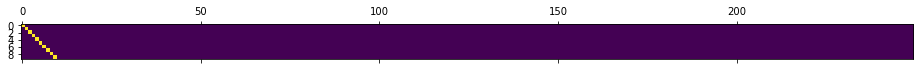

In [10]:
A = autoRegA()
plt.matshow(A.T)
plt.show()

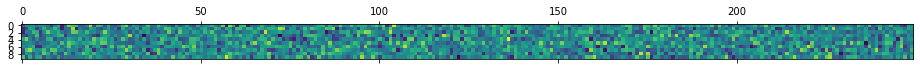

In [12]:
A = randomA()
plt.matshow(A.T)
plt.show()

In [13]:
checkOrthonormality(A)

True

## Beta parameters

##### Given a Stiefel matrix A, return the beta with minimal mean square prediction error on the training data set. 
Comparison between different ways of calculating beta.

In [19]:
def firstBeta(m=1, F=10):
    """ Keep the m first factors only"""
    beta = np.zeros(F)
    beta[:m] = 1
    return beta

def mpinv(A):
    """
    Returns the Moore-Penrose pseudo-inverse of A when A has linearly independent columns
    In this case mpinv(A) = inv(A.T @ A) @ A.T
    Dem : If we have A @ x = y then A.T @ A @ x = A.T @ y then x = (A.T @ A)^-1 @ A.T @ y
    """
    return np.linalg.inv(A.T @ A) @ A.T

# Home made calculation with home made Moore-Penrose inverse.
def fitBeta(A):
    
    # the dataframe of the 10 factors created from A with the (date, stock) in index 
    # ie for each day : 10 feature vectors of lenght 50 (nb of stock)
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    # We need targets = predictors @ beta ie we solve argmin_beta || predictors @ beta - targets ||_2
    # We use Moore-Penrose pseudo-inverse to compute least squares as A is orthogonal thus has linearly independent columns
    beta = mpinv(predictors) @ targets 
    
    return beta.to_numpy()

# Using pinv() from scipy instead of homemade mpinv()
def fitBeta1(A):
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    beta = pinv(predictors) @ targets 
    
    return beta

# Using scipy.linalg.lstsq
def fitBeta2(A):
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    w, residual, rnk, s = lstsq(predictors, targets)
    return w

# Using numpy.linalg.lstsq
def fitBeta3(A):
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    w, residual, rnk, s = np.linalg.lstsq(predictors, targets, rcond=None)
    return w

# Using lsq_linear which calls numpy.linalg.lstsq. lsq_linear allows to add bounds on the result.
def fitBeta4(A):
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    res = lsq_linear(predictors, targets)
    return res.x

# Using LinearRegression() which calls scipy.linalg.lstsq
# fit_intercept=False because we resolve Ax = y and not Ax + b = y
def fitBeta5(A):
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    res = LinearRegression(fit_intercept=False).fit(predictors, targets)
    return res.coef_

# Using homemade Gradient Descent
def fitBeta6(A, nbIter=5, eta=0.24): 
    predictors = X_train_reshape @ A 
    targets = Y_train.T.stack()
    D, F = A.shape  
    beta = np.zeros(F)
    for k in range(nbIter):
        # Compute Gradient
        pred = predictors @ beta
        delta = pred - targets
        gradient = delta @ predictors
        # Change beta
        beta -= eta * gradient
    
    return beta.to_numpy()

def findBestEta(A, nbiter, eta_list, true_beta):
    # Search on eta for gradient descent algorithm
    X = []
    y = []
    for eta in eta_list:
        beta_it = fitBeta6(A, nbiter, eta)
        error = np.mean(np.abs(true_beta-beta_it))
        X.append(eta)
        y.append(error)
    return X, y

def findBestIter(A, eta, true_beta, itermax, step):
    # Search on nbIter for gradient descent algorithm
    X = []
    y = []
    for it in range(step, itermax, step):
        beta_it = fitBeta6(A, it, eta)
        error = np.mean(np.abs(true_beta-beta_it))
        X.append(it)
        y.append(error)
    return X, y

def cost(A, beta):
    # MSE
    targets = Y_train.T.stack()
    Ypred = X_train_reshape @ A @ beta
    return np.mean((targets - Ypred) ** 2)

def compareFunctions(functions, A):
    resdict = {}
    for func in functions:
        beta = func(A) 
        c = cost(A, beta)
        mt = metric_train(A, beta)
        resdict[func.__name__] = {'beta':beta, 'cost':c, 'metric':mt}
        print(f"Running time of {func.__name__} : ")
        %timeit func(A)
    return resdict

**Time Comparaison**

In [20]:
fit_functions = [fitBeta, fitBeta1, fitBeta2, fitBeta3, fitBeta4, fitBeta5, fitBeta6]
A = randomA()

In [21]:
comparison = compareFunctions(fit_functions, A)

Running time of fitBeta : 
16.3 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta1 : 
13.9 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta2 : 
11.1 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta3 : 
10.6 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta4 : 
11.4 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta5 : 
14.6 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running time of fitBeta6 : 
23.1 ms ± 670 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Recap**

Algo     | Made with                 | Time (ms)|
:--------|:--------------------------|:--------:|
fitbeta  | homemade mpinv            | 16.3     |
fitbeta1 | scipy mpinv               | 13.9     |
fitbeta2 | scipy lstsq               | 11.1     |
fitbeta3 | numpy lstsq               | 10.6     |
fitbeta4 | numpy lsq_linear          | 11.4     |
fitbeta5 | Linear Regression sklearn | 14.6     |
fitbeta6 | Gradient Descent          | 23.1     |

- All algos find the same beta
- lsq_linear same speed as numpy lstsq version, coherent as it is what is called in lsq_linear
- Doc says LinearRegression() uses scipy.linalg.lstsq. Slower but coherent as it creates the LinearRegression() predictor object.
- Gradient descent results same than with analytical solution. A bit slower but should be faster if there were more samples. With well chosen eta, only 5 iterations are enough.


In [22]:
comparison

{'fitBeta': {'beta': array([ 0.00444415, -0.00386663,  0.01953762, -0.00010352, -0.0147928 ,
         -0.00100667, -0.01967126, -0.0025159 ,  0.00146463, -0.00669531]),
  'cost': 0.00016212464903384103,
  'metric': 0.03353682331075633},
 'fitBeta1': {'beta': array([ 0.00444415, -0.00386663,  0.01953762, -0.00010352, -0.0147928 ,
         -0.00100667, -0.01967126, -0.0025159 ,  0.00146463, -0.00669531]),
  'cost': 0.00016212464903384103,
  'metric': 0.03353682331075635},
 'fitBeta2': {'beta': array([ 0.00444415, -0.00386663,  0.01953762, -0.00010352, -0.0147928 ,
         -0.00100667, -0.01967126, -0.0025159 ,  0.00146463, -0.00669531]),
  'cost': 0.00016212464903384106,
  'metric': 0.03353682331075632},
 'fitBeta3': {'beta': array([ 0.00444415, -0.00386663,  0.01953762, -0.00010352, -0.0147928 ,
         -0.00100667, -0.01967126, -0.0025159 ,  0.00146463, -0.00669531]),
  'cost': 0.00016212464903384106,
  'metric': 0.03353682331075632},
 'fitBeta4': {'beta': array([ 0.00444415, -0.0038

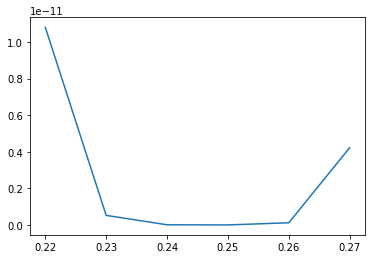

In [254]:
# Find best eta
ex, ey = findBestEta(A, 10, [0.22, 0.23, 0.24, 0.25, 0.26, 0.27], beta)
plt.plot(ex, ey)
plt.show()

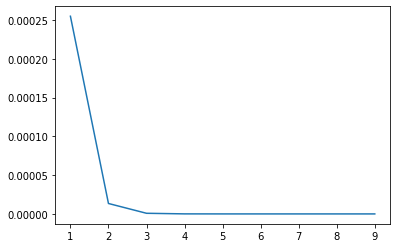

In [255]:
# Find best nb of iteration
px, py = findBestIter(A, 0.24, beta, 10, 1)
plt.plot(px, py)
plt.show()

# Model examples

##### Test 1: The autoregressive model AR(10)
$$
S_{t+1} := \sum_{\ell=1}^{10} \beta_\ell R_{t+1-\ell}
$$
where the $\beta_\ell$'s are fitted by minimizing the mean square prediction error on the training data set. 

In [74]:
A = autoRegA()
beta = fitBeta3(A)

metric_train(A, beta) # public metric: 0.02403

0.0240279909468876

##### Test 2: The two factor model using '5-day returns' and 'momentum'
This model is suggested in the description of the challenge and reads
$$
S_{t+1} := \beta_1 \,R_t^{(5)} + \beta_2 \,R_{t-20}^{(230)},\qquad \text{ with }\quad R_t^{(m)}:= \frac1{\sqrt{m}}\sum_{k=1}^{m} R_{t+1-k},
$$
where we find the parameters $\beta_1$ and $\beta_2$ by minimizing the mean square prediction error on the training data set.  

In [77]:
A = np.zeros((250,2))

A[0:5, 0] = 1/np.sqrt(5) # 5-day return factor
A[20:250, 1] = 1/np.sqrt(230) # momentum factor

beta = fitBeta3(A)

metric_train(A, beta) 

0.019538512062321056

### The benchmark

This is the code for the benchmark provided in the challenge description. 

In [262]:
def benchmark(Niter = 1000, seed = 1234):
    maxMetric = -1
    final_A = None
    final_beta = None
    
    if seed != None:
        np.random.seed(seed)

    for iteration in range(Niter):

        # Generate a uniform random Stiefel matric A and fit beta with minimal mean square prediction error on the training data set
        A = randomA()
        beta = fitBeta3(A)

        # compute the metric on the training set and keep the best result   
        m = metric_train(A, beta)   
        if m > maxMetric:
            print(iteration, 'metric_train:', m)
            maxMetric = m
            final_A = A
            final_beta = beta  
            
    return final_A, final_beta

In [265]:
bm_A, bm_beta = benchmark(10000)

0 metric_train: 0.02331346933035976
1 metric_train: 0.03319696206337413
3 metric_train: 0.0353020486076357
7 metric_train: 0.03999544914662606
67 metric_train: 0.04359368936926122
138 metric_train: 0.04433262132928288
496 metric_train: 0.044414163457964506
675 metric_train: 0.04578782187329136
1361 metric_train: 0.050941880955295345
7772 metric_train: 0.05296251546223647


In [266]:
metric_train(bm_A, bm_beta) # public metric: 0.05296

0.05296251546223647

### Random iteration for each added column

In [8]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

def colbycol(Niter = 1000, seed = 1234):
    """
    In this algorithm we build A column by column ie feature by feature
    We first find the best single feature to predict returns we can by generating them randomly.
    Then, once this feature is chosen, we find the best second feature which is orthogonal to the first.
    Etc by always generating the columns 1 by 1 in the orthogonal space of the previous
    """
    curr_A = np.array([[]], dtype=np.float64).reshape(250,0)
    curr_beta = None
    new_A = None
    new_beta = None
    
    if seed != None:
        np.random.seed(seed)
    
    for feature in range(10):
        print('Col', feature)
        maxMetricFeature = -1
        orthoProj = np.eye(250)
        for c in range(feature):
            orthoProj -= np.outer(curr_A[:, c], curr_A[:, c])
        
        for it in range(Niter):
            new_col = orthoProj @ np.random.randn(250, 1) # sample random vectors in the space orthogonal to the first columns of A
            new_col = normalize(new_col) # normalize
            A = np.hstack([curr_A, new_col])
            # revient au même que A = np.linalg.qr(np.stack([curr_A, np.random.randn(250, 1)]))[0]
            beta = fitBeta3(A)
            m = metric_train(A, beta)   
            if m > maxMetricFeature:
                print('Col', feature, ': iteration', it, 'metric_train:', m)
                maxMetricFeature = m
                new_A = A
                new_beta = beta
                
        curr_A = new_A
        curr_beta = new_beta
        print('Max metric after col' + str(feature) + ' : ' + str(maxMetricFeature))
            
    return curr_A, curr_beta


In [9]:
c_A, c_beta = colbycol()

Col 0
Col 0 : iteration 0 metric_train: 0.005951857607465095
Col 0 : iteration 1 metric_train: 0.011492247491336803
Col 0 : iteration 3 metric_train: 0.012061042988993163
Col 0 : iteration 4 metric_train: 0.013001726678457738
Col 0 : iteration 16 metric_train: 0.017710098496731788
Col 0 : iteration 18 metric_train: 0.018157599336601493
Col 0 : iteration 39 metric_train: 0.019845484818175215
Col 0 : iteration 66 metric_train: 0.024673526930165366
Col 0 : iteration 73 metric_train: 0.028965171747664293
Col 0 : iteration 300 metric_train: 0.031252045682852864
Max metric after col0 : 0.031252045682852864
Col 1
Col 1 : iteration 0 metric_train: 0.03172763983737262
Col 1 : iteration 1 metric_train: 0.032390591397669886
Col 1 : iteration 2 metric_train: 0.03295711296896577
Col 1 : iteration 5 metric_train: 0.0336676008825952
Col 1 : iteration 11 metric_train: 0.034765102088608495
Col 1 : iteration 22 metric_train: 0.03843190824602348
Col 1 : iteration 47 metric_train: 0.038539358204351
Col 1 

In [10]:
metric_train(c_A, c_beta) # public metric: 0.087384

0.08738380479311589

### Genetic Algo

# Postprocessing

## From $(A, \beta)$ to the output csv format

In [11]:
# A, beta to output.
def parametersTransform(A, beta, D=250, F=10, version = 2):
    """
    Version 1:
    Will stack the values of A day after day 
    ie A1d1, A2d1, ..., A10d1, A1d2, A2d2, ..., A10d2, ..., A1d250, ..., A10d250, beta1, ..., beta10
    This is the format used in metric file.

    Version 2:
    Will stack the vectors of A ie A1, A2, ..., A10, beta
    ie A1d1, A1d2, ..., A1d250, A2d1, ..., A2d250, ..., A10d1, ..., A10d250, beta1, ..., beta10
    """
    if A.shape != (D, F):
        print('A has not the good shape')
        return
    if beta.shape[0] != F:
        print('beta has not the good shape')
        return

    if version == 1:       
        output = np.hstack((np.vstack([A, beta])))
    elif version == 2:     
        output = np.hstack([np.hstack(A.T), beta])

    return output

# output to A, beta
def transform_output_to_A_beta(A_beta, version = 2):

    beta = A_beta[-10:].reshape(10)
    if version == 1:
        A = A_beta[:-10].reshape((250, 10))
    elif version == 2:
        A = A_beta[:-10].reshape((10, 250)).T
    return A, beta

In [13]:
# from output to csv file...
output = parametersTransform(c_A, c_beta)
pd.DataFrame(output).to_csv('submission_08738.csv')

In [16]:
# ... and back
output_fromCsv = pd.read_csv('submission_08738.csv', index_col=0, sep=',').to_numpy()
A, beta = transform_output_to_A_beta(output_fromCsv)

## Evaluation metric
Official evalutation script

In [21]:
# Evaluation functions provided with the Challenge
def transform_submission_to_ypred(df_A_beta, x_test, y_test):
    """ Transform submission output (A, beta) into predicted returns S_t."""
    
    A = df_A_beta[:-10].reshape((250, 10))
    beta = df_A_beta[-10:].reshape(10)

    E = pd.DataFrame(A.T @ A - np.eye(10)).abs()  

    # check orthogonality of A
    if any(E.unstack() > 1e-6): 
        return None

    x_test = x_test.T
    y_test = y_test.T

    x_test = x_test[y_test.columns]

    x_test_reshape = pd.concat([x_test.shift(i+1).stack(dropna=False) for i in range(250)], 1).dropna()
    y_pred = (x_test_reshape @ A @ beta).unstack()

    return y_pred.T


def metric(df_y_true, df_y_pred):
    """ Compute metric. """
    if df_y_pred is None:  # If the y_pred has only zeroes, the metric is set to -1.
        return -1.0
    
    y_true = df_y_true.T
    y_pred = df_y_pred.T
    
    y_true = y_true.div(y_true.pow(2.0).sum(1).pow(0.5), 0)
    y_pred = y_pred.div(y_pred.pow(2.0).sum(1).pow(0.5), 0)

    mean_overlap = (y_true * y_pred).sum(1).mean()

    return mean_overlap

def evaluateModel(df_A_beta, x_test, y_test):
    y_pred = transform_submission_to_ypred(df_A_beta, x_test, y_test)
    res = metric(y_test, y_pred)
    print(f"Metric : {res}")
    return res

In [24]:
note = evaluateModel(output_fromCsv, X_train, Y_train)

0.0873838047931159

## Annex

### Method to recast a model with < 10 factor to the framework (not useful for tests)
The construction below actually shows how a model with $F\leq 10$ factors can be recasted into the framework of the challenge. Only useful for submissions as the checkOrthogonality method here checks depending of the number of features whereas the official metric always takes 10 features.*

In [76]:
# Step 1: Create a 250x10 matrix A with the two first columns representing the factors of interest

A = np.zeros((250,10))

A[0:5, 0] = 1/np.sqrt(5) # 5-day return factor
A[20:250, 1] = 1/np.sqrt(230) # momentum factor

# Step 2: Fill the remaining columns of A with random orthonormal vectors, that are orthogonal to the two first columns

orthoProj = np.eye(250) - np.outer(A[:, 0], A[:, 0]) - np.outer(A[:, 1], A[:, 1]) # projection matrix on the orthogonal to the span of A[:,0] and A[:,1]
A_remaining_columns = orthoProj @ np.random.randn(250, 8) # sample random vectors in the space orthogonal to the first two columns of A
A_remaining_columns = np.linalg.qr(A_remaining_columns)[0] # orthonormalize these vectors with Gram-Schmidt algorithm
A[:, 2:] = A_remaining_columns

# Step 3: Compute the mean square optimal beta_1, beta_2 and then complete the vector beta with zeros

predictors = X_train_reshape @ A[:, :2]
targets = Y_train.T.stack()
beta = mpinv(predictors) @ targets
beta = np.hstack([beta, np.zeros(8)])


metric_train(A, beta) # public metric: 0.01787

0.019538512062321056